In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data1=pd.read_csv('taylor_swift_spotify.csv')
data1   .head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Fortnight (feat. Post Malone),THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,1,6dODwocEuGzHAavXqTbwHv,spotify:track:6dODwocEuGzHAavXqTbwHv,0.5020,0.504,0.386,0.000015,0.0961,-10.976,0.0308,192.004,0.281,82,228965
1,1,The Tortured Poets Department,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,2,4PdLaGZubp4lghChqp8erB,spotify:track:4PdLaGZubp4lghChqp8erB,0.0483,0.604,0.428,0.000000,0.1260,-8.441,0.0255,110.259,0.292,79,293048
2,2,My Boy Only Breaks His Favorite Toys,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,3,7uGYWMwRy24dm7RUDDhUlD,spotify:track:7uGYWMwRy24dm7RUDDhUlD,0.1370,0.596,0.563,0.000000,0.3020,-7.362,0.0269,97.073,0.481,80,203801
3,3,Down Bad,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,4,1kbEbBdEgQdQeLXCJh28pJ,spotify:track:1kbEbBdEgQdQeLXCJh28pJ,0.5600,0.541,0.366,0.000001,0.0946,-10.412,0.0748,159.707,0.168,82,261228
4,4,"So Long, London",THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,5,7wAkQFShJ27V8362MqevQr,spotify:track:7wAkQFShJ27V8362MqevQr,0.7300,0.423,0.533,0.002640,0.0816,-11.388,0.3220,160.218,0.248,80,262974


In [40]:
data1.tail()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
577,577,Our Song,Taylor Swift (Deluxe Edition),2006-10-24,11,1j6gmK6u4WNI33lMZ8dC1s,spotify:track:1j6gmK6u4WNI33lMZ8dC1s,0.11100,0.668,0.672,0.000000,0.3290,-4.931,0.0303,89.011,0.539,64,201106
578,578,I'm Only Me When I'm With You,Taylor Swift (Deluxe Edition),2006-10-24,12,7CzxXgQXurKZCyHz9ufbo1,spotify:track:7CzxXgQXurKZCyHz9ufbo1,0.00452,0.563,0.934,0.000807,0.1030,-3.629,0.0646,143.964,0.518,56,213053
579,579,Invisible,Taylor Swift (Deluxe Edition),2006-10-24,13,1k3PzDNjg38cWqOvL4M9vq,spotify:track:1k3PzDNjg38cWqOvL4M9vq,0.63700,0.612,0.394,0.000000,0.1470,-5.723,0.0243,96.001,0.233,54,203226
580,580,A Perfectly Good Heart,Taylor Swift (Deluxe Edition),2006-10-24,14,0YgHuReCSPwTXYny7isLja,spotify:track:0YgHuReCSPwTXYny7isLja,0.00349,0.483,0.751,0.000000,0.1280,-5.726,0.0365,156.092,0.268,53,220146
581,581,Teardrops on My Guitar - Pop Version,Taylor Swift (Deluxe Edition),2006-10-24,15,1hxLyjC9D9Jpw6EAPKqWv4,spotify:track:1hxLyjC9D9Jpw6EAPKqWv4,0.04020,0.459,0.753,0.000000,0.0863,-3.827,0.0537,199.997,0.483,55,179066


In [41]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        582 non-null    int64  
 1   name              582 non-null    object 
 2   album             582 non-null    object 
 3   release_date      582 non-null    object 
 4   track_number      582 non-null    int64  
 5   id                582 non-null    object 
 6   uri               582 non-null    object 
 7   acousticness      582 non-null    float64
 8   danceability      582 non-null    float64
 9   energy            582 non-null    float64
 10  instrumentalness  582 non-null    float64
 11  liveness          582 non-null    float64
 12  loudness          582 non-null    float64
 13  speechiness       582 non-null    float64
 14  tempo             582 non-null    float64
 15  valence           582 non-null    float64
 16  popularity        582 non-null    int64  
 1

In [42]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,582.0,290.500000,168.153204,0.000000,145.250000,290.500000,435.750000,581.000
track_number,582.0,11.422680,8.042060,1.000000,5.000000,10.000000,15.000000,46.000
acousticness,582.0,0.333185,0.327171,0.000182,0.037325,0.184500,0.660000,0.971
danceability,582.0,0.580804,0.114553,0.175000,0.515000,0.593500,0.653000,0.897
energy,582.0,0.565832,0.191102,0.118000,0.418000,0.571000,0.719000,0.948
instrumentalness,582.0,0.003393,0.027821,0.000000,0.000000,0.000002,0.000058,0.333
liveness,582.0,0.161130,0.136563,0.033500,0.096525,0.114500,0.161000,0.931
loudness,582.0,-7.661986,2.904653,-17.932000,-9.400750,-7.352500,-5.494750,-1.927
speechiness,582.0,0.056475,0.070859,0.023100,0.030300,0.037600,0.054800,0.912
tempo,582.0,122.398954,30.408485,68.097000,96.888000,119.054500,143.937250,208.918


In [43]:
data1.isnull().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [44]:
data1.shape

(582, 18)

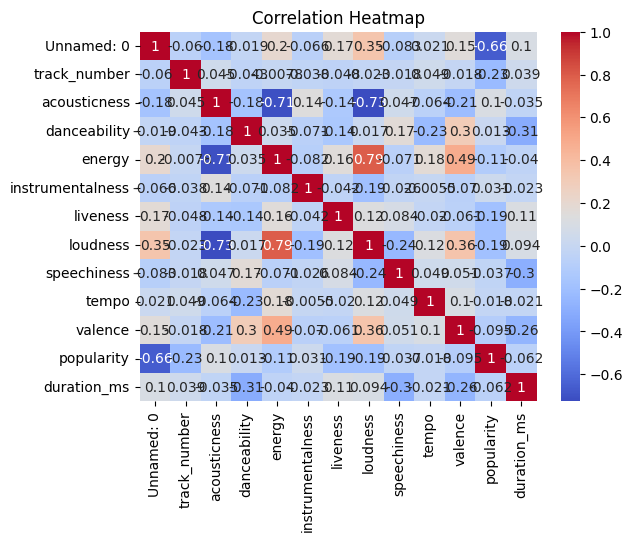

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,582.000000,582.00000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,290.500000,11.42268,0.333185,0.580804,0.565832,0.003393,0.161130,-7.661986,0.056475,122.398954,0.391000,57.857388,240011.189003
std,168.153204,8.04206,0.327171,0.114553,0.191102,0.027821,0.136563,2.904653,0.070859,30.408485,0.195829,16.152520,45928.954305
min,0.000000,1.00000,0.000182,0.175000,0.118000,0.000000,0.033500,-17.932000,0.023100,68.097000,0.038400,0.000000,83253.000000
25%,145.250000,5.00000,0.037325,0.515000,0.418000,0.000000,0.096525,-9.400750,0.030300,96.888000,0.230000,45.000000,211823.000000
50%,290.500000,10.00000,0.184500,0.593500,0.571000,0.000002,0.114500,-7.352500,0.037600,119.054500,0.374000,62.000000,235433.000000
75%,435.750000,15.00000,0.660000,0.653000,0.719000,0.000058,0.161000,-5.494750,0.054800,143.937250,0.522500,70.000000,260819.500000
max,581.000000,46.00000,0.971000,0.897000,0.948000,0.333000,0.931000,-1.927000,0.912000,208.918000,0.943000,93.000000,613026.000000


In [45]:
sns.heatmap(data1.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
data1.describe()

In [46]:
cat_cols = data1.select_dtypes(include='object').columns
print("Categorical Columns:", cat_cols)
df_encoded = data1.copy()
for col in cat_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))


Categorical Columns: Index(['name', 'album', 'release_date', 'id', 'uri'], dtype='object')


In [47]:
target = 'popularity'
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [51]:
y_pred = model.predict(X_test_scaled)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.8461299407388886
RMSE: 5.996881525775546


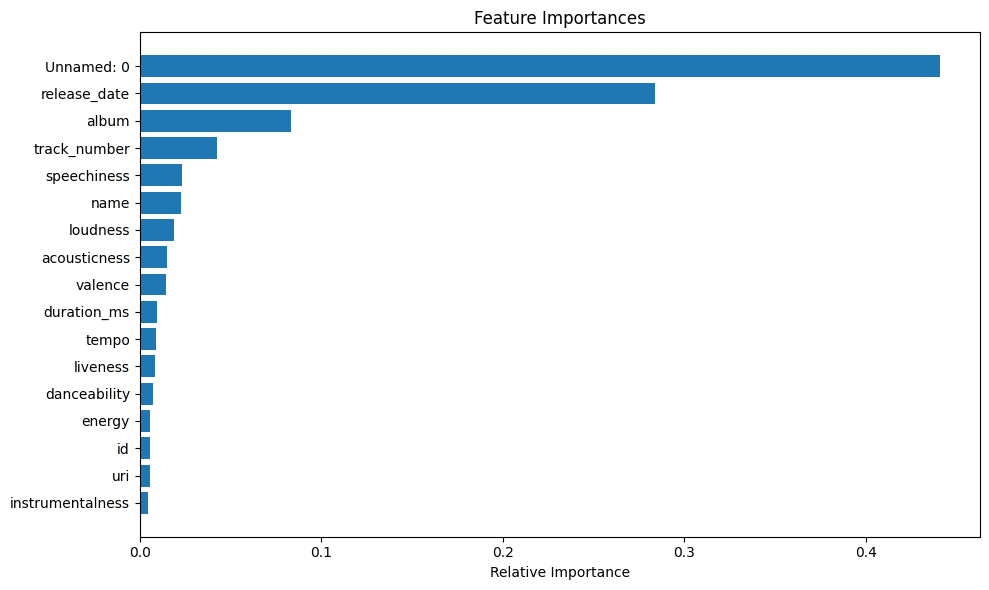

In [52]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

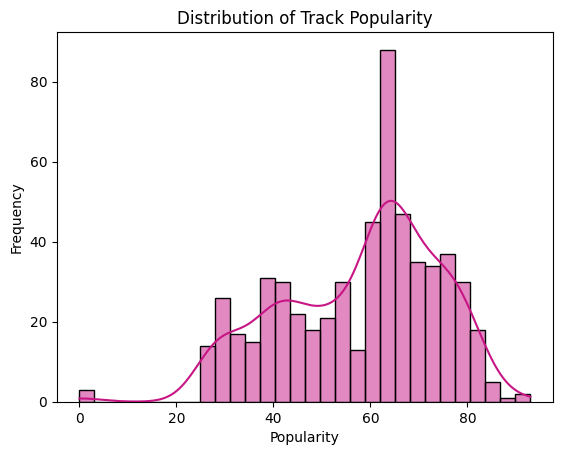

In [53]:
sns.histplot(data1['popularity'], bins=30, kde=True, color='mediumvioletred')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()


In [55]:
print(data1.columns)


Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')


In [56]:
# Fix column name by renaming
data1.rename(columns=lambda x: x.strip().lower(), inplace=True)


/var/folders/s9/9mvfxgrs1wb9r54tth0nzksm0000gn/T/ipykernel_3575/1120348644.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data1, x='duration_ms', y='popularity',palette='cool')


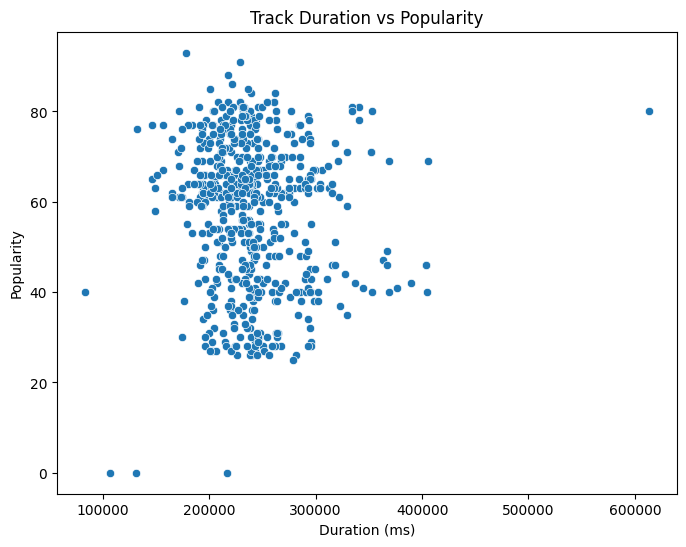

In [60]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data1, x='duration_ms', y='popularity',palette='cool')
plt.title('Track Duration vs Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()


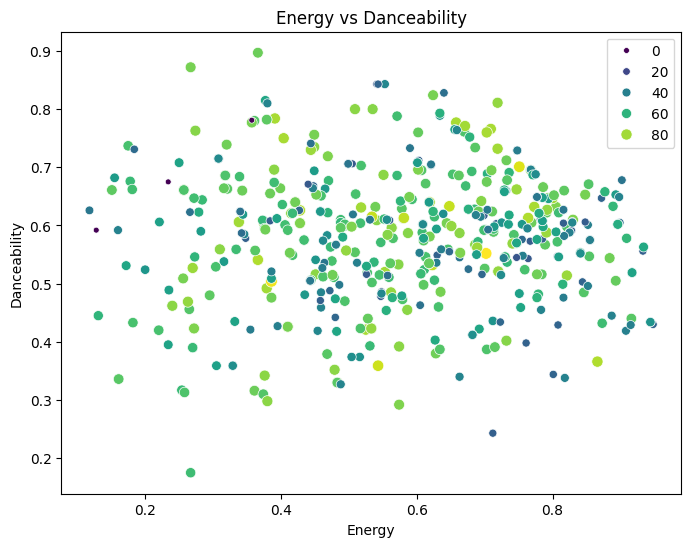

In [61]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data1, x='energy', y='danceability', size='popularity', hue='popularity', palette='viridis')
plt.title('Energy vs Danceability')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.legend(loc='best')
plt.show()


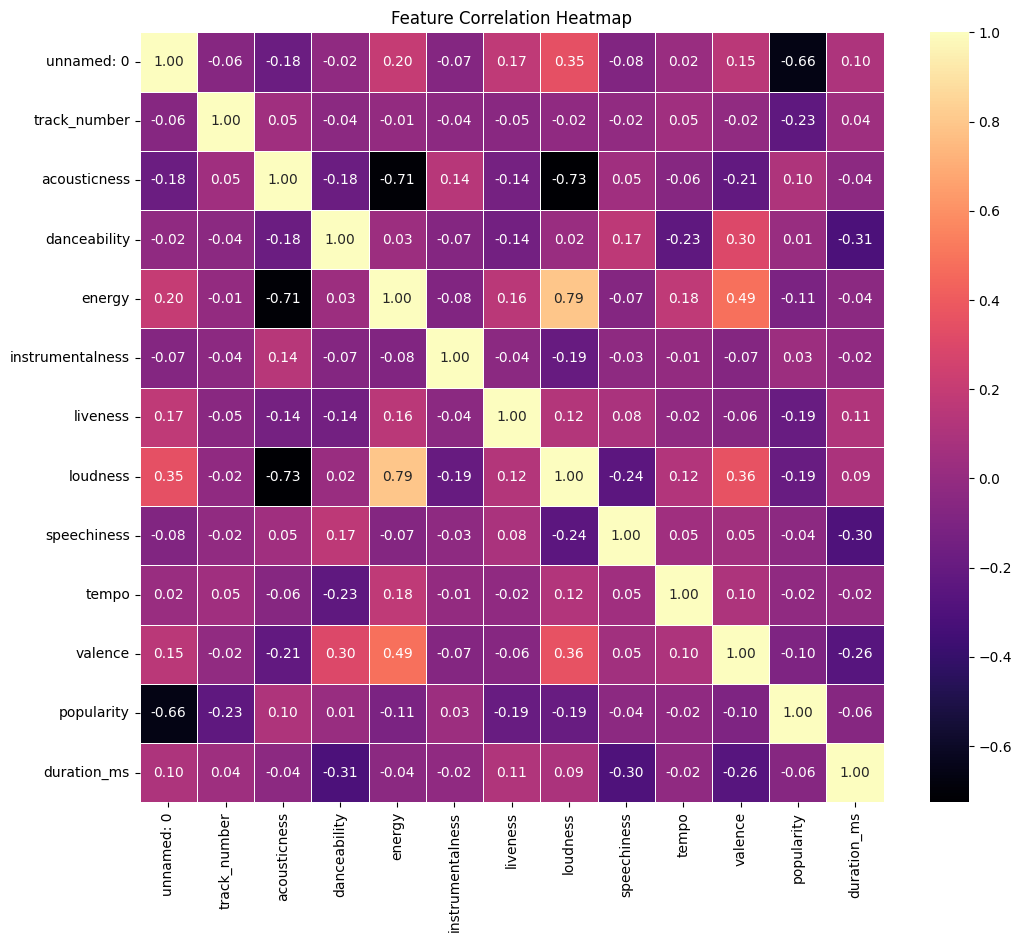

In [62]:
plt.figure(figsize=(12,10))
sns.heatmap(data1.corr(numeric_only=True), annot=True, fmt=".2f", cmap="magma", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


/var/folders/s9/9mvfxgrs1wb9r54tth0nzksm0000gn/T/ipykernel_3575/113128957.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, y='name', x='popularity', palette='pink')


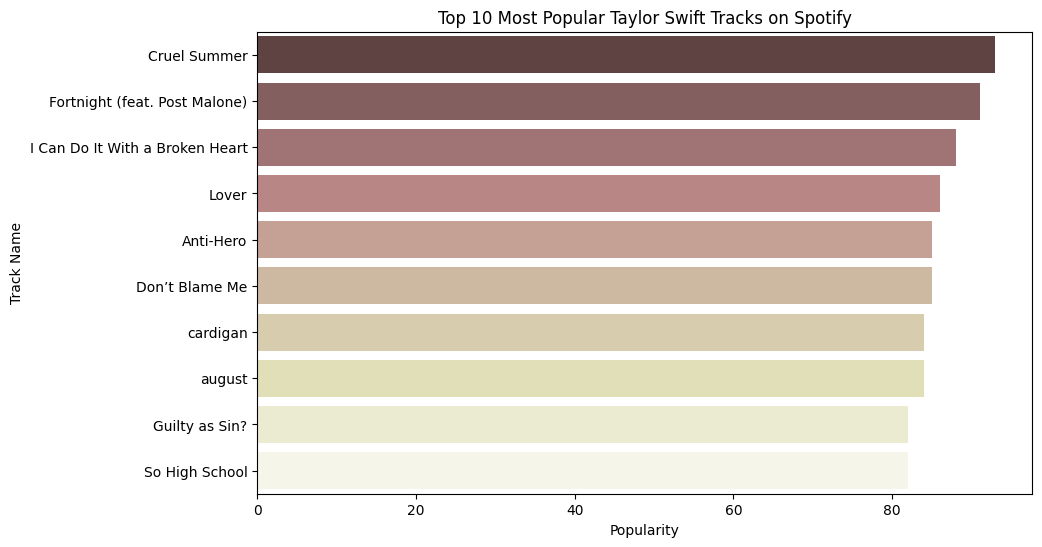

In [66]:
top10 = data1.sort_values(by='popularity', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top10, y='name', x='popularity', palette='pink')
plt.title("Top 10 Most Popular Taylor Swift Tracks on Spotify")
plt.xlabel("Popularity")
plt.ylabel("Track Name")
plt.show()


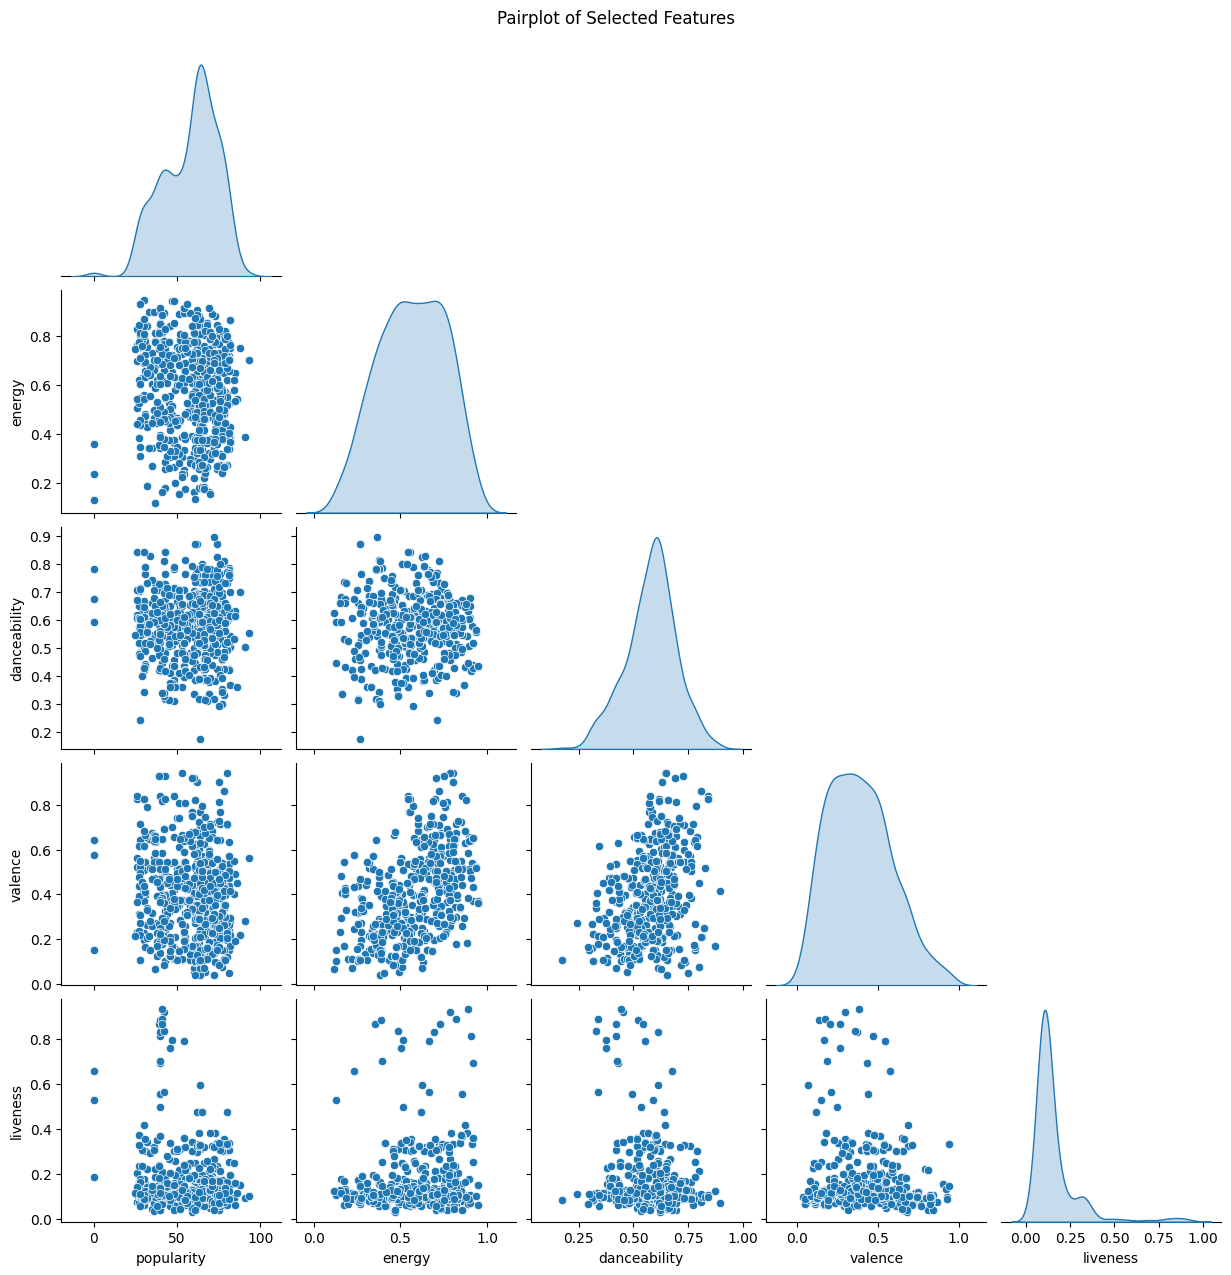

In [67]:
sns.pairplot(data1[['popularity', 'energy', 'danceability', 'valence', 'liveness']], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


/var/folders/s9/9mvfxgrs1wb9r54tth0nzksm0000gn/T/ipykernel_3575/1036965416.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data1, x='album', y='valence', palette='Spectral')


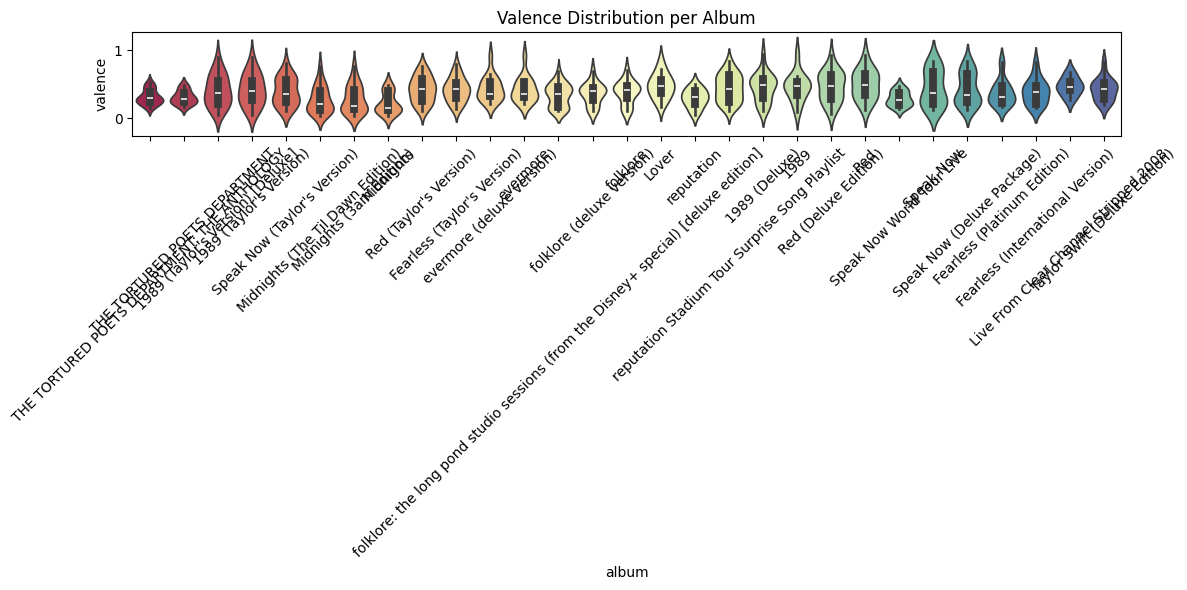

In [69]:
if 'album' in data1.columns:
    plt.figure(figsize=(12,6))
    sns.violinplot(data=data1, x='album', y='valence', palette='Spectral')
    plt.title('Valence Distribution per Album')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


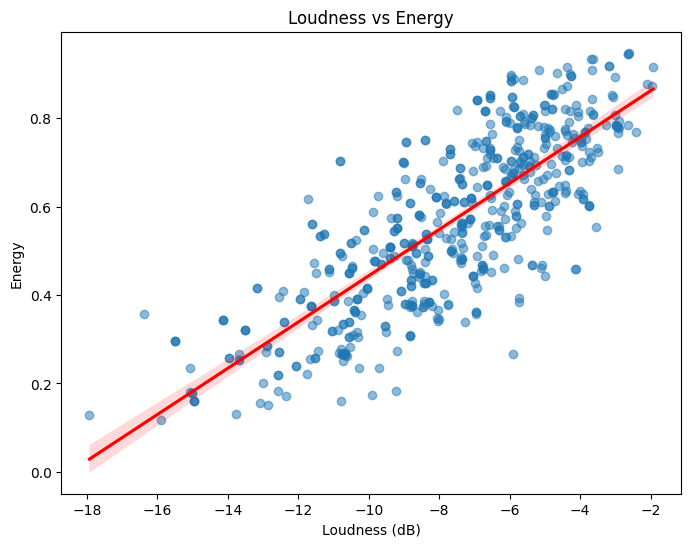

In [70]:
plt.figure(figsize=(8,6))
sns.regplot(data=data1, x='loudness', y='energy', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Loudness vs Energy")
plt.xlabel("Loudness (dB)")
plt.ylabel("Energy")
plt.show()


/var/folders/s9/9mvfxgrs1wb9r54tth0nzksm0000gn/T/ipykernel_3575/3525900031.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data1, y='album', palette='cubehelix')


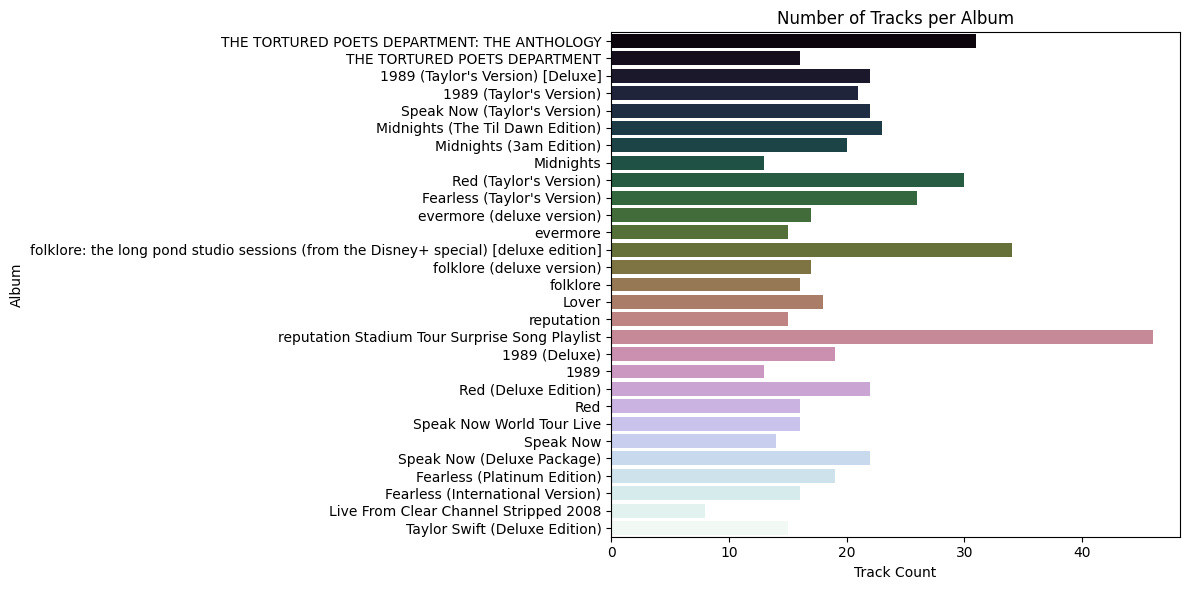

In [71]:
if 'album' in data1.columns:
    plt.figure(figsize=(12,6))
    sns.countplot(data=data1, y='album', palette='cubehelix')
    plt.title("Number of Tracks per Album")
    plt.xlabel("Track Count")
    plt.ylabel("Album")
    plt.tight_layout()
    plt.show()